<a href="https://colab.research.google.com/github/IanCramer/Arr.js-Testing/blob/master/FeatureExperiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import sklearn

# from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer#, TfidfTransformer
from sklearn.model_selection import GridSearchCV#, cross_val_score, train_test_split, KFold, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, classification_report, ConfusionMatrixDisplay

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
def test(model, X, y, test_num):
    predicted = model.predict(X)
    target_names = ['not awesome', 'awesome']
    print("==== results on test set " + str(test_num) + " ====== \n ")
    print(classification_report(y, predicted, target_names=target_names))
    ConfusionMatrixDisplay.from_estimator(
        model, X, y, display_labels=target_names, xticks_rotation="vertical"
    )
    return f1_score(y, predicted, average='weighted')

In [3]:
# Loading Data Prep
path = '/content/drive/MyDrive/1. School and Education/2020-2023 Northwestern/2023_Q2_Spring/CS 349 (TA)/Project/divided_datasets/'
categories = ['Automotive', 'CDs_and_Vinyl', 'Cell_Phones_and_Accessories', 'Grocery_and_Gourmet_Food', 'Sports_and_Outdoors', 'Toys_and_Games']


# Select the columns we want to use as input and output
X_cols = ['asin', 'reviewerID', 'verified', 'reviewerName', 'reviewText', 'summary']
y_col = 'awesomeness'

In [4]:
#@title CDs and Vinyl
category = 'CDs_and_Vinyl'

In [5]:
# Load the Training Data
train_df = pd.read_json(f'{path}{category}_train.json')

In [6]:
# Load Testing Data
test1_df = pd.read_json(f'{path}{category}_test1.json')
test2_df = pd.read_json(f'{path}{category}_test2.json')
test3_df = pd.read_json(f'{path}{category}_test3.json')

In [7]:
# Construct the vectorizer for vectorizing text data
vectorizer = CountVectorizer()

In [8]:
# Vectorize and Transform the training data
train_X_text = train_df[X_cols].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
train_X = vectorizer.fit_transform(train_X_text)

train_y  = train_df[y_col]

In [9]:
# Vectorize and separate the testing data
test1_X_text = test1_df[X_cols].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
test1_X = vectorizer.transform(test1_X_text)
test1_y = test1_df[y_col]

test2_X_text = test2_df[X_cols].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
test2_X = vectorizer.transform(test2_X_text)
test2_y = test2_df[y_col]

test3_X_text = test3_df[X_cols].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
test3_X = vectorizer.transform(test3_X_text)
test3_y = test3_df[y_col]

In [10]:
# Construct a MultinomialNB Classifier
nb = MultinomialNB()
# Set the hyperparameters to be tuned during cross validation training
param_grid = {'alpha': [1*10**-10, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1.0, 2.0, 4.0, 8.0],
              'fit_prior': [True, False]
              }

In [11]:
# Perform 10-fold cross validation training that searches for optimal hyper parameters
grid_search = GridSearchCV(nb, param_grid, cv=10)
grid_search.fit(train_X, train_y)
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'alpha': 1e-10, 'fit_prior': False}


In [12]:
# Establish the optimal MultinomialNB Classifier with the best hyper parameters
nb = grid_search.best_estimator_
# Train/Fit the MultinomialNB classifier
nb.fit(train_X, train_y)

MultinomialNB(alpha=1e-10, fit_prior=False)

In [ ]:
svm = LinearSVC(verbose = True)
param_grid = {'C': [0.1, 1, 10],
              'gamma': [0.1, 1, 10],
              'kernel': ['linear', 'rbf']}

[LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(verbose=True)

In [ ]:
rf = RandomForestClassifier(n_estimators = 10 , verbose=10, n_jobs = -1, max_depth = 200)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

==== results on test set 1 ====== 
 
              precision    recall  f1-score   support

 not awesome       0.93      0.92      0.92    117923
     awesome       0.94      0.94      0.94    139005

    accuracy                           0.93    256928
   macro avg       0.93      0.93      0.93    256928
weighted avg       0.93      0.93      0.93    256928

==== results on test set 2 ====== 
 
              precision    recall  f1-score   support

 not awesome       0.93      0.92      0.92     78581
     awesome       0.93      0.94      0.94     92705

    accuracy                           0.93    171286
   macro avg       0.93      0.93      0.93    171286
weighted avg       0.93      0.93      0.93    171286

==== results on test set 3 ====== 
 
              precision    recall  f1-score   support

 not awesome       0.93      0.92      0.92    156506
     awesome       0.94      0.94      0.94    186065

    accuracy                           0.93    342571
   macro avg     

0.9313110215568692

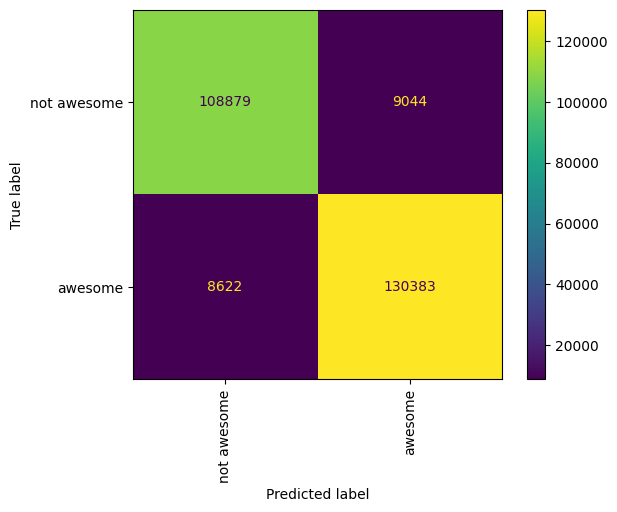

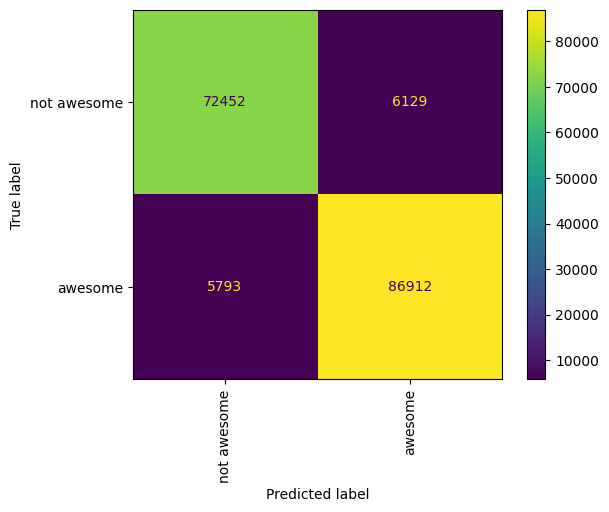

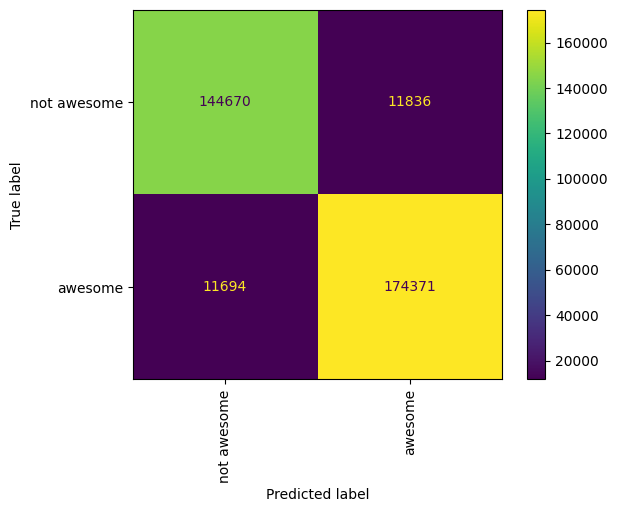

In [13]:
test(nb, test1_X, test1_y, 1)
test(nb, test2_X, test2_y, 2)
test(nb, test3_X, test3_y, 3)

In [ ]:
test(svm, test1_X, test1_y, 1)
test(svm, test2_X, test2_y, 2)
test(svm, test3_X, test3_y, 3)

In [ ]:
test(rf, test1_X, test1_y, 1)
test(rf, test2_X, test2_y, 2)
test(rf, test3_X, test3_y, 3)

In [14]:
#@title Grocery and Gourmet Food
category = 'Grocery_and_Gourmet_Food'

In [15]:
# Load the Training Data
train_df = pd.read_json(f'{path}{category}_train.json')

In [16]:
# Load Testing Data
test1_df = pd.read_json(f'{path}{category}_test1.json')
test2_df = pd.read_json(f'{path}{category}_test2.json')
test3_df = pd.read_json(f'{path}{category}_test3.json')

In [17]:
# Construct the vectorizer for vectorizing text data
vectorizer = CountVectorizer()

In [18]:
# Vectorize and Transform the training data
train_X_text = train_df[X_cols].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
train_X = vectorizer.fit_transform(train_X_text)

train_y  = train_df[y_col]

In [19]:
# Vectorize and separate the testing data
test1_X_text = test1_df[X_cols].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
test1_X = vectorizer.transform(test1_X_text)
test1_y = test1_df[y_col]

test2_X_text = test2_df[X_cols].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
test2_X = vectorizer.transform(test2_X_text)
test2_y = test2_df[y_col]

test3_X_text = test3_df[X_cols].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
test3_X = vectorizer.transform(test3_X_text)
test3_y = test3_df[y_col]

In [20]:
# Construct a MultinomialNB Classifier
nb = MultinomialNB()
# Set the hyperparameters to be tuned during cross validation training
param_grid = {'alpha': [1*10**-10, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1.0, 2.0, 4.0, 8.0],
              'fit_prior': [True, False]
              }

In [21]:
# Perform 10-fold cross validation training that searches for optimal hyper parameters
grid_search = GridSearchCV(nb, param_grid, cv=10)
grid_search.fit(train_X, train_y)
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'alpha': 0.1, 'fit_prior': True}


In [22]:
# Establish the optimal MultinomialNB Classifier with the best hyper parameters
nb = grid_search.best_estimator_
# Train/Fit the MultinomialNB classifier
nb.fit(train_X, train_y)

MultinomialNB(alpha=0.1)

In [ ]:
svm = LinearSVC(verbose = True)
svm.fit(train_X, train_y)

[LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(verbose=True)

In [ ]:
rf = RandomForestClassifier(n_estimators = 10 , verbose=10, n_jobs = -1, max_depth = 200)
rf.fit(train_X, train_y)

==== results on test set 1 ====== 
 
              precision    recall  f1-score   support

 not awesome       0.92      0.93      0.93     93491
     awesome       0.95      0.94      0.94    120030

    accuracy                           0.94    213521
   macro avg       0.94      0.94      0.94    213521
weighted avg       0.94      0.94      0.94    213521

==== results on test set 2 ====== 
 
              precision    recall  f1-score   support

 not awesome       0.93      0.93      0.93     62469
     awesome       0.95      0.94      0.94     79878

    accuracy                           0.94    142347
   macro avg       0.94      0.94      0.94    142347
weighted avg       0.94      0.94      0.94    142347

==== results on test set 3 ====== 
 
              precision    recall  f1-score   support

 not awesome       0.92      0.93      0.93    124604
     awesome       0.95      0.94      0.94    160091

    accuracy                           0.94    284695
   macro avg     

0.9367329899064546

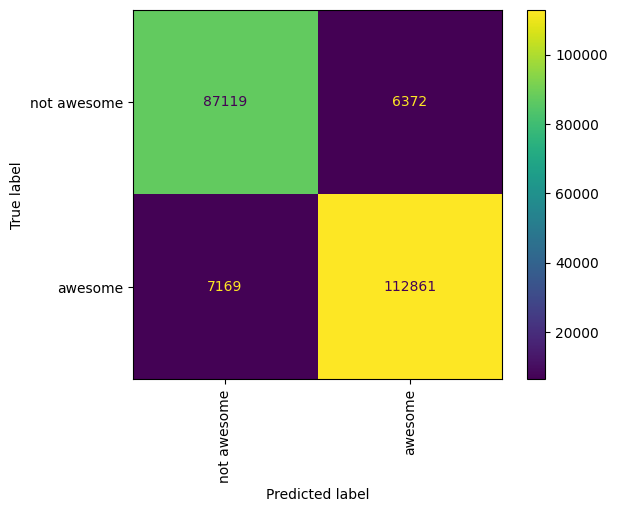

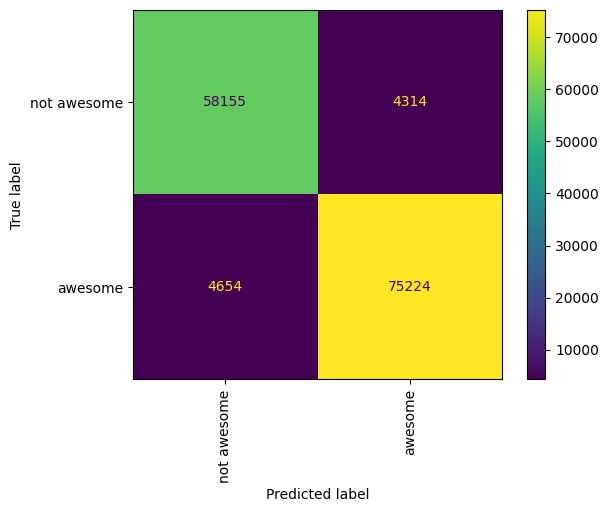

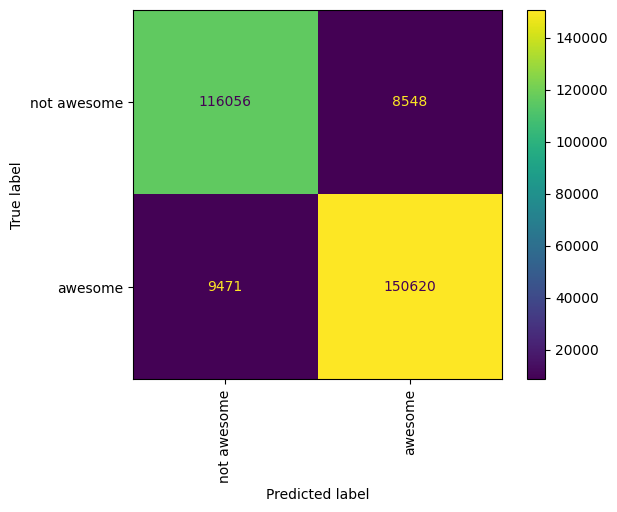

In [23]:
test(nb, test1_X, test1_y, 1)
test(nb, test2_X, test2_y, 2)
test(nb, test3_X, test3_y, 3)

In [ ]:
test(svm, test1_X, test1_y, 1)
test(svm, test2_X, test2_y, 2)
test(svm, test3_X, test3_y, 3)

In [ ]:
test(rf, test1_X, test1_y, 1)
test(rf, test2_X, test2_y, 2)
test(rf, test3_X, test3_y, 3)

In [24]:
#@title Toys and Games
category = 'Toys_and_Games'

In [25]:
# Load the Training Data
train_df = pd.read_json(f'{path}{category}_train.json')

In [26]:
# Load Testing Data
test1_df = pd.read_json(f'{path}{category}_test1.json')
test2_df = pd.read_json(f'{path}{category}_test2.json')
test3_df = pd.read_json(f'{path}{category}_test3.json')

In [27]:
# Construct the vectorizer for vectorizing text data
vectorizer = CountVectorizer()

In [28]:
# Vectorize and Transform the training data
train_X_text = train_df[X_cols].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
train_X = vectorizer.fit_transform(train_X_text)

train_y  = train_df[y_col]

In [29]:
# Vectorize and separate the testing data
test1_X_text = test1_df[X_cols].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
test1_X = vectorizer.transform(test1_X_text)
test1_y = test1_df[y_col]

test2_X_text = test2_df[X_cols].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
test2_X = vectorizer.transform(test2_X_text)
test2_y = test2_df[y_col]

test3_X_text = test3_df[X_cols].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
test3_X = vectorizer.transform(test3_X_text)
test3_y = test3_df[y_col]

In [30]:
# Construct a MultinomialNB Classifier
nb = MultinomialNB()
# Set the hyperparameters to be tuned during cross validation training
param_grid = {'alpha': [1*10**-10, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1.0, 2.0, 4.0, 8.0],
              'fit_prior': [True, False]
              }

In [31]:
# Perform 10-fold cross validation training that searches for optimal hyper parameters
grid_search = GridSearchCV(nb, param_grid, cv=10)
grid_search.fit(train_X, train_y)
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'alpha': 0.01, 'fit_prior': True}


In [32]:
# Establish the optimal MultinomialNB Classifier with the best hyper parameters
nb = grid_search.best_estimator_
# Train/Fit the MultinomialNB classifier
nb.fit(train_X, train_y)

MultinomialNB(alpha=0.01)

In [ ]:
svm = LinearSVC(verbose = True)
svm.fit(train_X, train_y)

[LibLinear]

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(verbose=True)

In [ ]:
rf = RandomForestClassifier(n_estimators = 10 , verbose=10, n_jobs = -1, max_depth = 200)
rf.fit(train_X, train_y)

==== results on test set 1 ====== 
 
              precision    recall  f1-score   support

 not awesome       0.91      0.91      0.91    145286
     awesome       0.93      0.93      0.93    184182

    accuracy                           0.92    329468
   macro avg       0.92      0.92      0.92    329468
weighted avg       0.92      0.92      0.92    329468

==== results on test set 2 ====== 
 
              precision    recall  f1-score   support

 not awesome       0.91      0.91      0.91     96410
     awesome       0.93      0.93      0.93    123236

    accuracy                           0.92    219646
   macro avg       0.92      0.92      0.92    219646
weighted avg       0.92      0.92      0.92    219646

==== results on test set 3 ====== 
 
              precision    recall  f1-score   support

 not awesome       0.91      0.91      0.91    192964
     awesome       0.93      0.93      0.93    246327

    accuracy                           0.92    439291
   macro avg     

0.9228694293726417

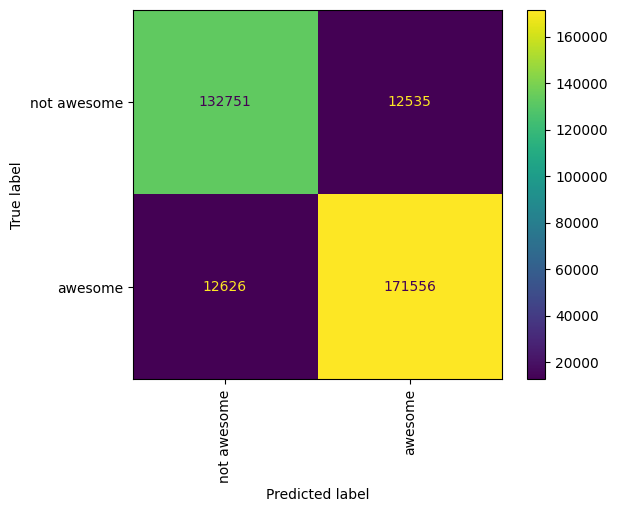

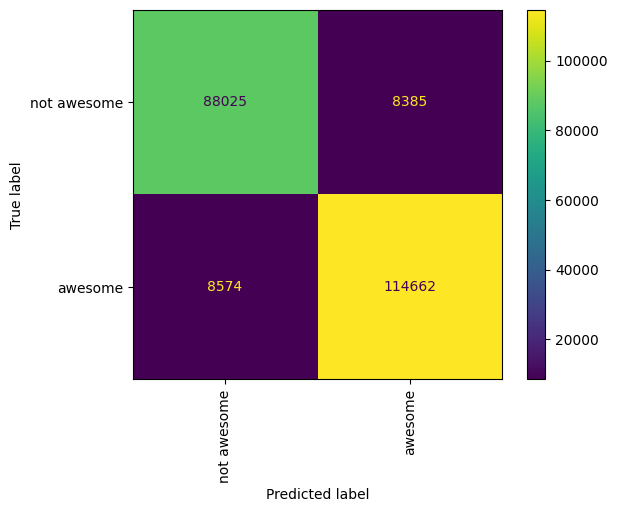

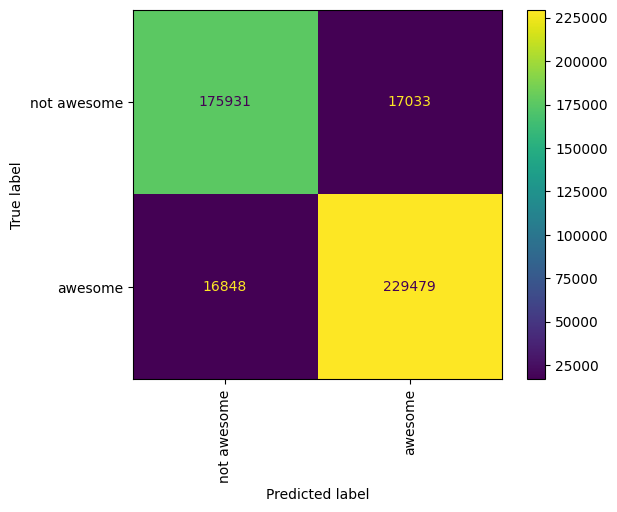

In [33]:
test(nb, test1_X, test1_y, 1)
test(nb, test2_X, test2_y, 2)
test(nb, test3_X, test3_y, 3)

In [ ]:
test(svm, test1_X, test1_y, 1)
test(svm, test2_X, test2_y, 2)
test(svm, test3_X, test3_y, 3)

In [ ]:
test(rf, test1_X, test1_y, 1)
test(rf, test2_X, test2_y, 2)
test(rf, test3_X, test3_y, 3)